# Week 5: Python & Data 3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/electricity_dataset/Electricity

/content/drive/MyDrive/electricity_dataset/Electricity


In [3]:
import pandas as pd
import os

!pip install geopandas
!pip3 install basemap

from matplotlib.patches import Polygon as PG
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import geopandas as gpd
import folium
from matplotlib.patches import Patch
from shapely.geometry import Point, Polygon
import shapely.speedups
from geopandas import GeoDataFrame

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 92.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.5 MB/s eta 0:00:00


In [4]:
df_csv_append = pd.DataFrame()

df_csv_append = pd.read_csv('coteq_electricity_2020.csv')

2575

## Netwerk Data

In [7]:
df_csv_append.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89,95,89,1x35,3810,89,89
1,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,40,100,98,78,1x35,2637,95,83
2,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100,100,100,1x35,1366,100,94
3,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,41,93,85,54,3x25,5101,93,78
4,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,86,100,36,1x25,4315,100,93


In [9]:
df_csv_append.shape

(2575, 14)

In [11]:
df_csv_append.columns

Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc'],
      dtype='object')

In [12]:
df_csv_append.info

<bound method DataFrame.info of                   net_manager                          purchase_area  \
0     Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
1     Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2     Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
3     Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
4     Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
...                       ...                                    ...   
2570  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2571  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2572  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2573  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2574  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   

             street zipcode_from zipcode_to    city  num_connections  \
0       Dorpsstraat       7468C

In [13]:
df_csv_append.describe

<bound method NDFrame.describe of                   net_manager                          purchase_area  \
0     Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
1     Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2     Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
3     Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
4     Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
...                       ...                                    ...   
2570  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2571  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2572  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2573  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2574  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   

             street zipcode_from zipcode_to    city  num_connections  \
0       Dorpsstraat       746

In [14]:
df_csv_append.apply(np.max)

net_manager                                   Cogas Infra & Beheer BV
purchase_area                   Netbeheerder Centraal Overijssel B.V.
street                                           van den Vondelstraat
zipcode_from                                                   7610AB
zipcode_to                                                     7665EM
city                                                        OLDENZAAL
num_connections                                                   127
delivery_perc                                                     100
perc_of_active_connections                                        100
type_conn_perc                                                    100
type_of_connection                                               3x80
annual_consume                                                  53559
annual_consume_lowtarif_perc                                      100
smartmeter_perc                                                   100
dtype: object

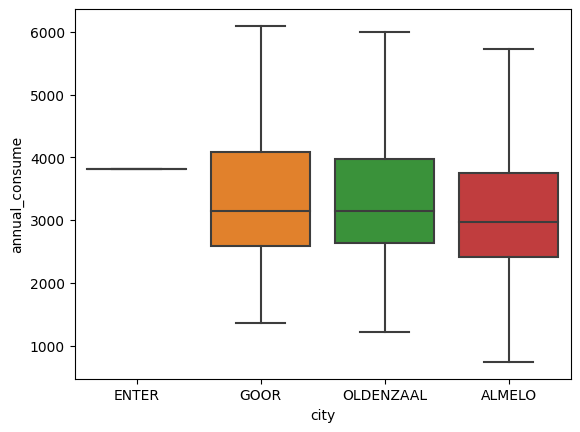

In [21]:
sns.boxplot(x="city", y="annual_consume", data=df_csv_append, showfliers = False);